In [6]:
%store -r africa_cpi_cl
%store -r highest_cpi_cl

### Charting with matplotlib

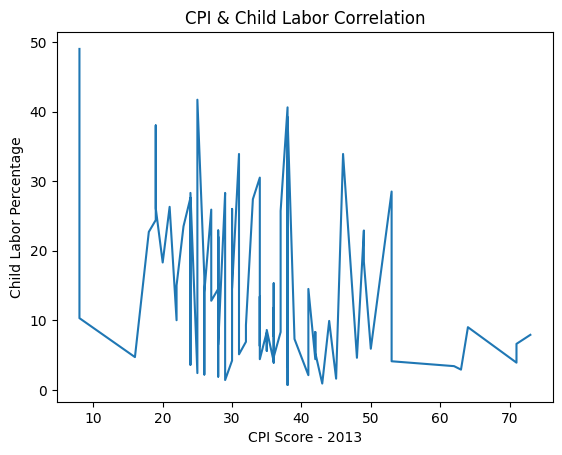

In [7]:
import matplotlib.pyplot as plt

# perceived corruption scores compared to the child labor percentages
plt.plot(africa_cpi_cl.columns['CPI 2013 Score'], 
         africa_cpi_cl.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')

plt.show()

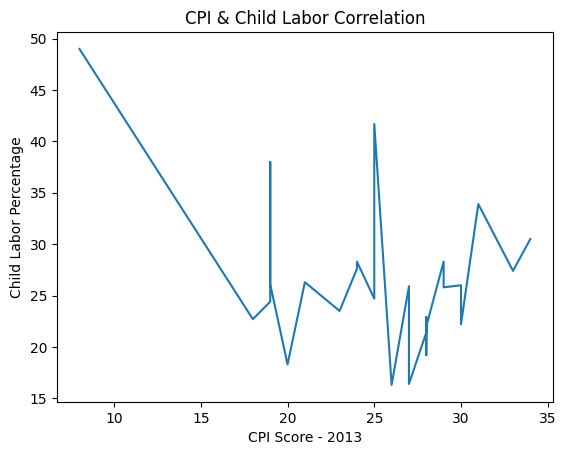

In [8]:
# perceived corruption scores compared to the child labor percentages   
plt.plot(highest_cpi_cl.columns['CPI 2013 Score'], 
         highest_cpi_cl.columns['Total (%)'])
plt.xlabel('CPI Score - 2013')
plt.ylabel('Child Labor Percentage')
plt.title('CPI & Child Labor Correlation')

plt.show()

### Charting with Bokeh

In [11]:
from bokeh.plotting import figure, show, output_file

def scatter_point(chart, x, y, marker_type):
    chart.scatter(x, y, marker=marker_type, line_color = '#6666ee', fill_color = '#ee6666', fill_alpha=0.7, size=10)

chart = figure(title = 'Perceived Corruption and Child Labor in Africa')
output_file('scatter_plot.html')
for row in africa_cpi_cl.rows:
    scatter_point(chart, float(row['CPI 2013 Score']), float(row['Total (%)']), 'circle')
    
show(chart)

In [12]:
# adding interactive elements in our charts.
from bokeh.plotting import ColumnDataSource, figure, show, output_file
from bokeh.models import HoverTool

TOOLS = 'pan,reset,hover'

def scatter_point(chart, x, y, source, marker_type):
    chart.scatter(x, y, source=source, marker=marker_type, line_color='#6666ee', fill_color='#ee6666', fill_alpha=0.7, size=10)

chart = figure(title='Perceived Corruption and Child Labor in Africa', tools=TOOLS)

output_file('scatter_int_plot.html')
for row in africa_cpi_cl.rows:
    column_source = ColumnDataSource(
            data={'country': [row['Country / Territory']]}
        )
    scatter_point(chart, float(row['CPI 2013 Score']), float(row['Total (%)']), column_source, 'circle')
    
hover = chart.select(dict(type=HoverTool))

hover.tooltips = [
    ('Country', '@country'),
    ('CPI Score', '$x'),
    ('Child Labor (%)', '$y')
]
show(chart)